In [1]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import geopandas as gpd
from descartes import PolygonPatch
import pandas as pd
import numpy as np
import seaborn as sns
import cbsodata

#load the data from CBS, this might take a while..
#Taking the DBs from 2015 onwards, since 2014 and prior used a different format..
buurt_data_15 = pd.DataFrame(cbsodata.get_data("83220NED"))
buurt_data_16 = pd.DataFrame(cbsodata.get_data("83487NED"))
buurt_data_17 = pd.DataFrame(cbsodata.get_data("83765NED"))
buurt_data_18 = pd.DataFrame(cbsodata.get_data("84286NED"))
buurt_data_19 = pd.DataFrame(cbsodata.get_data("84583NED"))
education_17 = pd.read_csv("data/education17.csv",sep=";",decimal=",")

In [2]:
dh_buurt_data_15 = buurt_data_15[(buurt_data_15["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_15["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_16 = buurt_data_16[(buurt_data_16["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_16["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_17 = buurt_data_17[(buurt_data_17["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_17["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_18 = buurt_data_18[(buurt_data_18["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_18["SoortRegio_2"]=="Buurt     ")]
dh_buurt_data_19 = buurt_data_19[(buurt_data_19["Gemeentenaam_1"]=="'s-Gravenhage                           ") & (buurt_data_19["SoortRegio_2"]=="Buurt     ")]

In [3]:
education_17.head(5)

,Wijk,Wijkcode,Buurt,Buurtcode,bevolking,dekkingsgraad,Laag,RSF_Laag,Middelbaar,RSF_Middelbaar,Hoog,RSF_Hoog
0,NaN,NaN,NaN,NaN,405985,68.0,32.7,1.5,35.8,1.2,31.4,1.7
1,Wijk 01 Oostduinen ...,1.0,NaN,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,1.0,Oostduinen ...,70.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Wijk 02 Belgisch Park ...,2.0,NaN,NaN,6295,60.5,17.1,7.3,37.5,6.3,45.4,5.6
4,NaN,2.0,Belgisch Park ...,71.0,6295,60.5,17.1,7.3,37.5,6.3,45.4,5.6


In [57]:
citizens_dh_15 = dh_buurt_data_15[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise")
citizens_dh_16 = dh_buurt_data_16[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise")
citizens_dh_17 = dh_buurt_data_17[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise")
citizens_dh_18 = dh_buurt_data_18[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise")
citizens_dh_19 = dh_buurt_data_19[['WijkenEnBuurten','AantalInwoners_5','WestersTotaal_17','Marokko_19','NederlandseAntillenEnAruba_20','Suriname_21','Turkije_22','OverigNietWesters_23']].rename(columns={'WijkenEnBuurten':'buurtname','AantalInwoners_5':'total_citizens','WestersTotaal_17':'total_western','Marokko_19':'morocco','NederlandseAntillenEnAruba_20':'antilles','Suriname_21':'suriname','Turkije_22':'turkey','OverigNietWesters_23':'other_non_western'}, errors="raise")

In [58]:
# citizens_dh_15["year"] = 2015
# # citizens_dh_15["ID"] = citizens_dh_15["buurtname"] + "_" + citizens_dh_15["year"].astype(str)
# # citizens_dh_15 = citizens_dh_15.set_index("ID")
# citizens_dh_16["year"] = 2016
# # citizens_dh_16["ID"] = citizens_dh_16["buurtname"] + "_" + citizens_dh_16["year"].astype(str)
# # citizens_dh_16 = citizens_dh_16.set_index("ID")
# citizens_dh_17["year"] = 2017
# # citizens_dh_17["ID"] = citizens_dh_17["buurtname"] + "_" + citizens_dh_17["year"].astype(str)
# # citizens_dh_17 = citizens_dh_17.set_index("ID")
# citizens_dh_18["year"] = 2018
# # citizens_dh_18["ID"] = citizens_dh_18["buurtname"] + "_" + citizens_dh_18["year"].astype(str)
# # citizens_dh_18 = citizens_dh_18.set_index("ID")
# citizens_dh_19["year"] = 2019
# # citizens_dh_19["ID"] = citizens_dh_19["buurtname"] + "_" + citizens_dh_19["year"].astype(str)
# # citizens_dh_19 = citizens_dh_19.set_index("ID")

In [59]:
citizens_dh = pd.concat([citizens_dh_15,citizens_dh_16,citizens_dh_17,citizens_dh_18,citizens_dh_19], keys=[2015,2016,2017,2018,2019])

In [60]:
citizens_dh

buurtname  total_citizens  total_western  morocco  antilles  \
2015 7375     Oostduinen               0              0        0         0   
     7377  Belgisch Park            7955           1840       75        70   
     7379  Westbroekpark             805            210        0        10   
     7380      Duttendel            1050            295        0         5   
     7382    Nassaubuurt            1515            445        5        10   
...                  ...             ...            ...      ...       ...   
2019 5813    De Rivieren              40              0        0         0   
     5815       De Lanen            5440            545      190       145   
     5816      De Velden            4200            430      135        45   
     5817      De Vissen            8620            885      340       105   
     5818      Rietbuurt            2795            285      190        65   

           suriname  turkey  other_non_western  
2015 7375         0       0                  0  
     7377       155      35                520  
     7379         5       0                 65  
     7380         5       5                 60  
     7382        25       0                145  
...             ...     ...                ...  
2019 5813         5       0                  0  
     5815       660     235                665  
     5816       455     140                485  
     5817       960     185                790  
     5818       325     105                300  

[570 rows x 8 columns]

buurtname
Archipelbuurt                AxesSubplot(0.125,0.125;0.775x0.755)
Arendsdorp                   AxesSubplot(0.125,0.125;0.775x0.755)
Belgisch Park                AxesSubplot(0.125,0.125;0.775x0.755)
Bezuidenhout-Midden          AxesSubplot(0.125,0.125;0.775x0.755)
Bezuidenhout-Oost            AxesSubplot(0.125,0.125;0.775x0.755)
                                             ...                 
Zijden, Steden en Zichten    AxesSubplot(0.125,0.125;0.775x0.755)
Zonne Veld                   AxesSubplot(0.125,0.125;0.775x0.755)
Zorgvliet                    AxesSubplot(0.125,0.125;0.775x0.755)
Zuiderpark                   AxesSubplot(0.125,0.125;0.775x0.755)
Zuidwal                      AxesSubplot(0.125,0.125;0.775x0.755)
Name: other_non_western, Length: 117, dtype: object

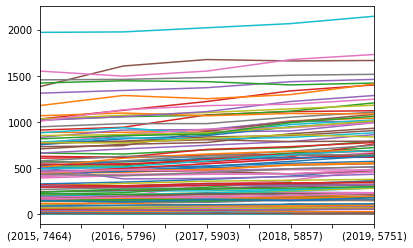

In [67]:
citizens_dh.groupby("buurtname")["other_non_western"].plot()